<a href="https://colab.research.google.com/github/drpetros11111/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/blob/master/Visualizing_the_Learning_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
x,y = sklearn.datasets.make_moons(200, noise = 0.20)

# Using the Moon Dataset

The line of code

    x, y = sklearn.datasets.make_moons(200, noise=0.20)

is used to generate a synthetic dataset that is shaped like two interleaving half circles, commonly known as the "moons" dataset.

This is a popular toy dataset used for classification tasks and testing algorithms in machine learning.

Here's a detailed breakdown of what this code does:

---
---


# Explanation
    sklearn.datasets.make_moons

This function is part of the sklearn.datasets module in scikit-learn, a widely used machine learning library in Python.

The make_moons function generates a binary classification dataset with two classes shaped like crescent moons.

##200

This specifies the number of samples (data points) to generate. In this case, 200 data points will be created.

##noise=0.20

This parameter adds Gaussian noise to the data. The noise level is set to 20%.

Gaussian noise refers to a type of statistical noise that follows a normal distribution, also known as a Gaussian distribution.

This type of noise is commonly used in various fields, including signal processing, machine learning, and statistics, to simulate real-world variations and uncertainties in data.

----
##Key Characteristics of Gaussian Noise
###Normal Distribution

Gaussian noise is characterized by a bell-shaped probability distribution known as the Gaussian (or normal) distribution.
The distribution is defined by two parameters:

##Mean (μ)

The central value around which the data points are distributed.

##Standard Deviation (σ)

A measure of the spread or dispersion of the data points around the mean.

##Symmetry

The Gaussian distribution is symmetric about the mean, indicating that deviations above and below the mean are equally likely.

##Random Variation

When Gaussian noise is added to data, each data point is perturbed by a random amount drawn from the Gaussian distribution.

This simulates natural variability and uncertainties that occur in real-world data.

##In the Context of make_moons
When the noise parameter is specified in the sklearn.datasets.make_moons function, Gaussian noise is added to the generated data points.

Here's what this means:

###Perturbation

Each data point generated by the make_moons function is moved randomly from its original position.

###Noise Level

The noise parameter controls the standard deviation (σ) of the Gaussian distribution used for this perturbation.

A higher value of noise means greater variability and larger deviations from the original data points.

-----
##Visual Example
Imagine the "moons" dataset without noise:

The data points form two distinct, interleaving half circles.

When Gaussian noise is added (e.g., noise=0.20):

The data points are randomly scattered around their original positions, making the half circles less distinct and more spread out.

-----
##Purpose of Adding Gaussian Noise
Testing Robustness: Adding noise makes the classification task more challenging, helping to test the robustness and generalization ability of machine learning models.

###Simulating Real-world Data

Real-world data often contains noise and imperfections. By adding Gaussian noise, synthetic datasets better simulate real-world conditions.

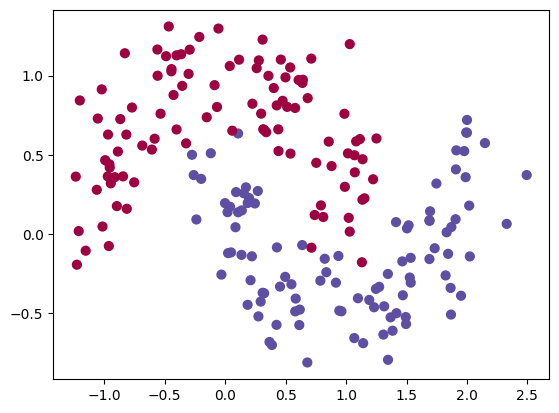

In [3]:
plt.scatter(x[:,0],x[:,1], s = 40, c = y, cmap = plt.cm.Spectral)
plt.show()

# Plot a Scatter Plot
This code uses Matplotlib, a plotting library in Python, to create a scatter plot of your data. Here’s what each part does:

    plt.scatter

plt.scatter is a function in Matplotlib used to create a scatter plot. A scatter plot displays points defined by pairs of values from two variables.

-------
## Parameters
    x[:,0]

This selects all rows and the first column of x. In the context of your dataset, x is likely a 2D array where each row represents a data point, and each column represents a feature.

x[:,0] extracts the values of the first feature (or the x-coordinates of the data points).

-----
    x[:,1]

This selects all rows and the second column of x, extracting the values of the second feature (or the y-coordinates of the data points).

    s=40

This sets the size of each point in the scatter plot. Here, s is set to 40.

    c=y

This sets the color of each point.

The c parameter specifies the colors of the points. By setting c=y, the color of each point is determined by the corresponding value in y (your labels or classes).

Different values in y will result in different colors.

----
    cmap=plt.cm.Spectral

This sets the colormap to be used for mapping the y values to colors.

 plt.cm.Spectral is a specific colormap that spans a range of colors, making it easier to visually distinguish between different classes or labels in the plot.

-----
    plt.show()

This function displays the plot.

Without plt.show(), the plot would not be rendered and displayed on the screen.

----
##Putting It All Together:
x[:,0] and x[:,1] extract the x and y coordinates of the data points, respectively.

s=40 specifies the size of the points.

c=y uses the class labels to determine the color of each point.

cmap=plt.cm.Spectral uses the Spectral colormap to map the labels to colors.

plt.show() displays the scatter plot.


In [4]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

# Converting x to a FloatTensor
In PyTorch, torch.FloatTensor and torch.LongTensor are used to convert data into specific tensor types that the library can work with efficiently.


---


Here’s a detailed explanation of each line:

##Converting x to a FloatTensor

    x = torch.FloatTensor(x)

This line converts the variable x into a tensor of type FloatTensor. Here’s what this means:

    x

This is your input data, which is likely a NumPy array or a similar data structure.

    torch.FloatTensor(x)

This converts x into a PyTorch tensor with floating-point numbers.

-----
#Why convert to FloatTensor?

##Neural Networks

Most neural network operations (e.g., matrix multiplications, convolutions) require floating-point numbers for gradient-based optimization techniques like backpropagation.

##Compatibility

PyTorch functions and methods expect data in tensor format. Converting to FloatTensor ensures that the data is in the correct format for these operations.

##Converting y to a LongTensor

    y = torch.LongTensor(y)

This line converts the variable y into a tensor of type LongTensor.

---
#Here’s what this means:

##y

This is your target or label data, which is likely a NumPy array or a similar data structure.

##torch.LongTensor(y)

This converts y into a PyTorch tensor with long integers (typically used for integer values).

----
#Why convert to LongTensor?

Classification Tasks: In classification tasks, target labels are often represented as integers (e.g., 0, 1, 2 for three classes). LongTensor is suitable for these integer labels.

Loss Functions: PyTorch loss functions like CrossEntropyLoss expect target labels in LongTensor format.

In [5]:
class FeedForward(torch.nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward,self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons,output_neurons)
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x


# Define Class FeedForward(torch.nn.Module):
This defines a new class called FeedForward which inherits from torch.nn.

##Module

In PyTorch, torch.nn.Module is the base class for all neural network modules. Custom models usually inherit from this class.

    def __init__(self, input_neurons, hidden_neurons, output_neurons):

The
    __init__ method

 is the constructor for the class. It initializes the layers of the neural network.

##input_neurons: The number of input features (neurons) in the input layer.

##hidden_neurons: The number of neurons in the hidden layer.

##output_neurons: The number of neurons in the output layer.

-----
    super(FeedForward, self).__init__():

This line calls the constructor of the parent class (torch.nn.Module) to properly initialize the module.

    self.hidden = nn.Linear(input_neurons, hidden_neurons)

This line defines a fully connected (linear) layer with input_neurons input features and hidden_neurons output features (neurons).

The nn.Linear layer performs a linear transformation to the incoming data: y = xA^T + b.

    self.out = nn.Linear(hidden_neurons, output_neurons)

This line defines another fully connected (linear) layer with hidden_neurons input features and output_neurons output features (neurons).

    def forward(self, x):

This method defines the forward pass of the neural network. The forward pass is the process by which input data is passed through the network to obtain the output.

    x = self.hidden(x)

The input x is passed through the first fully connected layer (self.hidden). This layer performs a linear transformation.

    x = F.relu(x)

The output of the first layer is passed through the ReLU activation function.

F.relu is an activation function that applies the rectified linear unit function element-wise:

    ReLU(x) = max(0, x)

This introduces non-linearity to the model, allowing it to learn more complex patterns.

    x = self.out(x)

The result from the ReLU activation is then passed through the second fully connected layer (self.out), which performs another linear transformation.

    return x

The final output x is returned. This output represents the predictions made by the network.

-----
#Summary
The FeedForward class defines a simple feedforward neural network with one hidden layer. The network consists of:

An input layer that connects to a hidden layer.

A hidden layer with a ReLU activation function.

An output layer that produces the final predictions.

Here's a brief summary of what each part does:

__init__ method: Initializes the layers of the network.
forward method: Defines how the data passes through the network during the forward pass.

This structure can be used for various tasks such as classification or regression, depending on how you define the output layer and the loss function used during training.

In [7]:
network = FeedForward(input_neurons = 2, hidden_neurons = 50, output_neurons = 2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)
loss_function = torch.nn.CrossEntropyLoss()

# Initializing the Network

    network = FeedForward(input_neurons=2, hidden_neurons=50, output_neurons=2)

## FeedForward

This is the class we defined earlier, which creates a simple feedforward neural network.

## input_neurons=2

The input layer of the network has 2 neurons. This means the input data should have 2 features.

## hidden_neurons=50

The hidden layer has 50 neurons. This layer will apply a linear transformation followed by a ReLU activation function.

## output_neurons=2

The output layer has 2 neurons. This is suitable for a binary classification task where there are two classes.


---


# Defining the Optimizer
    optimizer = torch.optim.SGD(network.parameters(), lr=0.02)

##torch.optim.SGD

This initializes the Stochastic Gradient Descent (SGD) optimizer.

##network.parameters()

This passes the parameters of the network to the optimizer, which means the optimizer will update these parameters during training.

##lr=0.02

This sets the learning rate for the optimizer to 0.02. The learning rate controls how much the optimizer updates the parameters in each step.

A smaller learning rate makes the training process more stable, but slower.

A larger learning rate makes the training process faster, but it can be unstable and may overshoot the optimal solution.

----
##Defining the Loss Function

    loss_function = torch.nn.CrossEntropyLoss()

##torch.nn.CrossEntropyLoss

This initializes the cross-entropy loss function. Cross-entropy loss is commonly used in classification problems.

It measures the difference between the predicted probability distribution (from the model) and the true distribution (the actual labels).

----
##Cross-entropy loss is appropriate here because:

The network's output layer has 2 neurons, which can represent the predicted probabilities for two classes.

Cross-entropy loss expects the raw scores (logits) as inputs, which means the final layer should not apply a softmax activation.

Instead, the CrossEntropyLoss function internally applies softmax to convert logits to probabilities.

-----
#Summary
In summary, this snippet sets up a feedforward neural network for a classification task with the following components:

##Network:

A feedforward neural network with 2 input neurons, 50 hidden neurons, and 2 output neurons.

##Optimizer

Stochastic Gradient Descent (SGD) with a learning rate of 0.02, used to update the network's parameters during training.

##Loss Function

Cross-entropy loss function, used to measure the performance of the network's predictions during training.

The setup indicates that the network is designed for a binary classification task, where each input has 2 features, and there are 2 possible output classes.

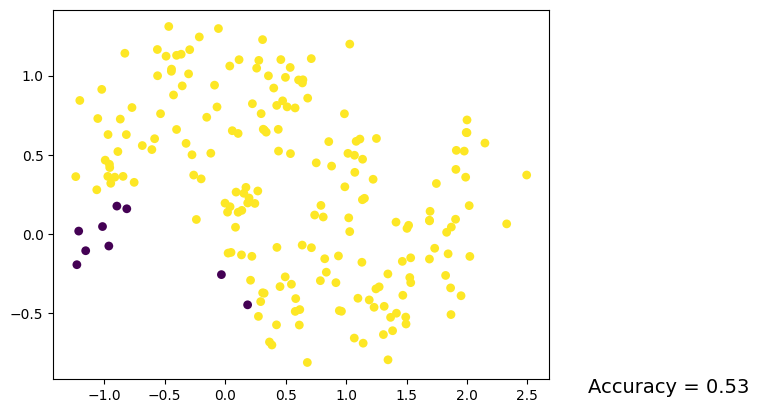

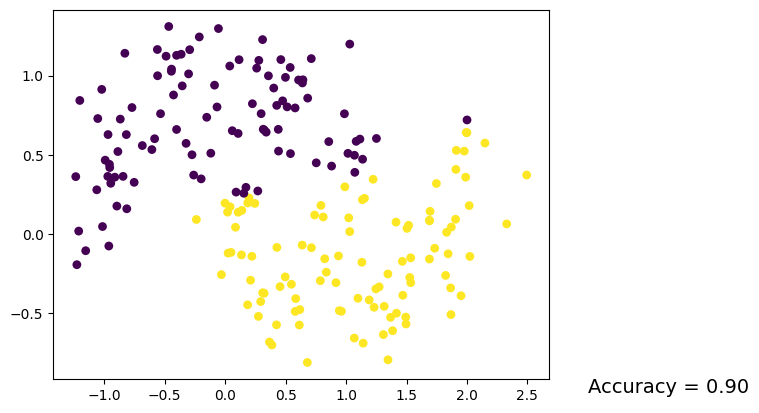

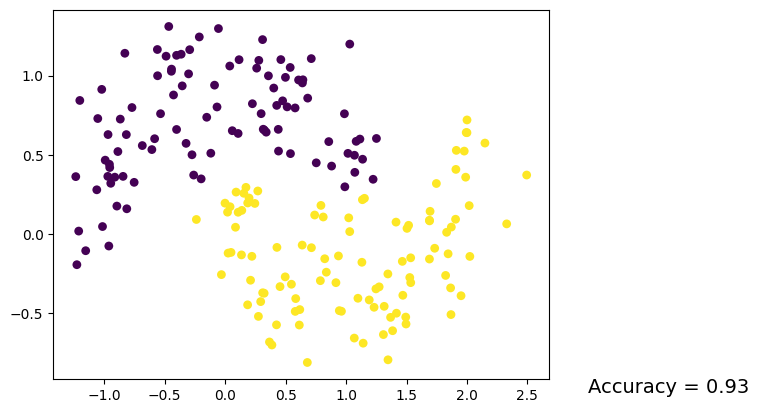

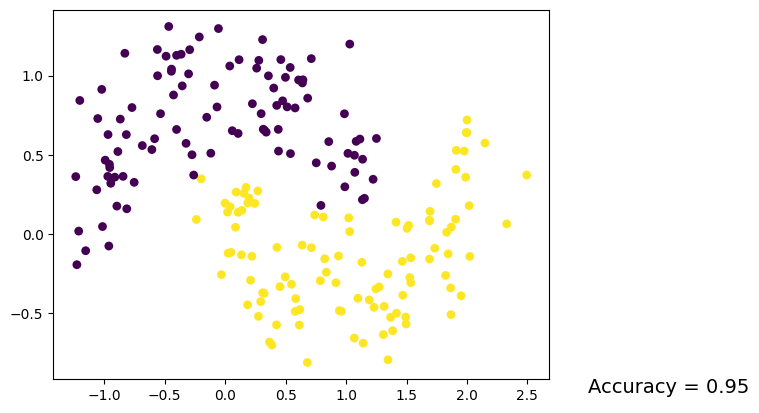

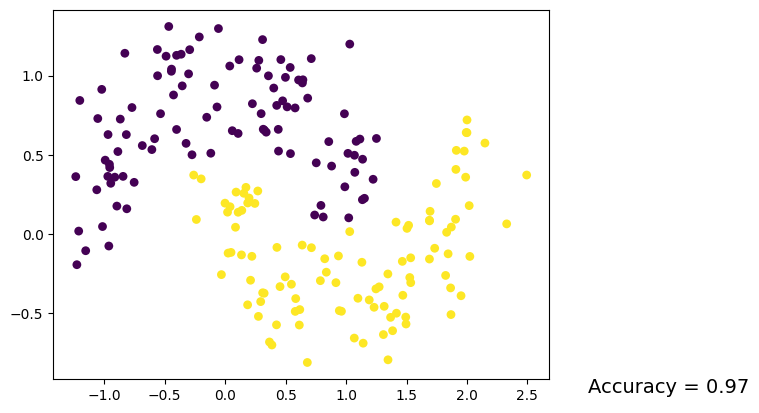

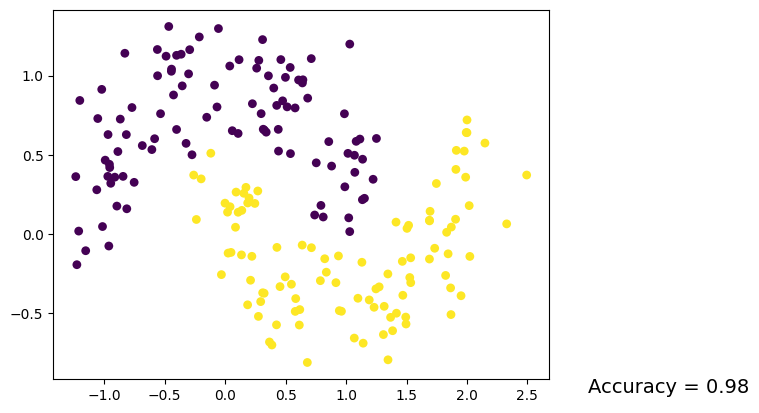

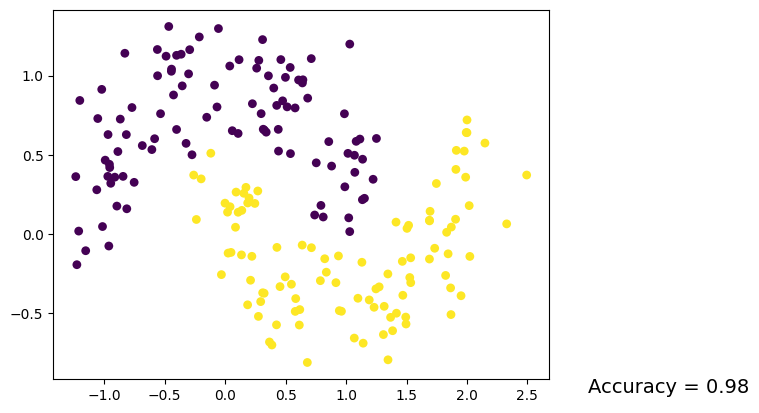

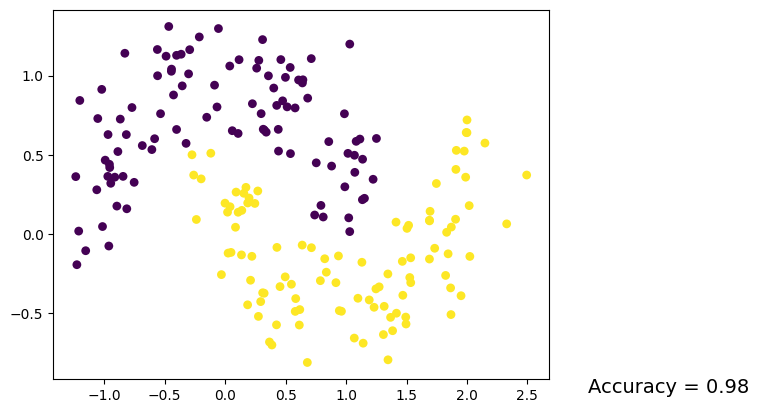

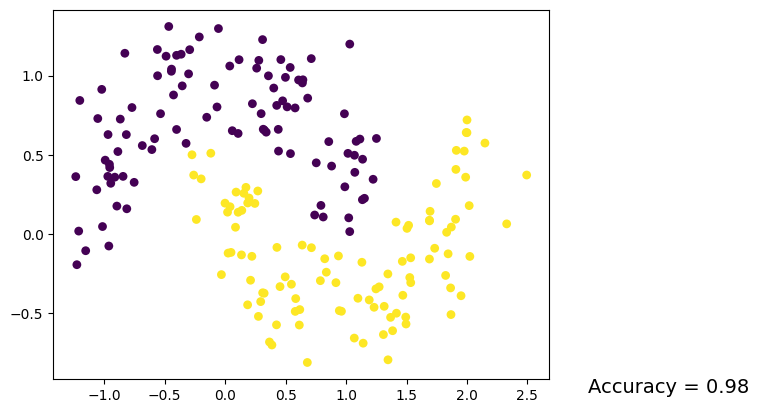

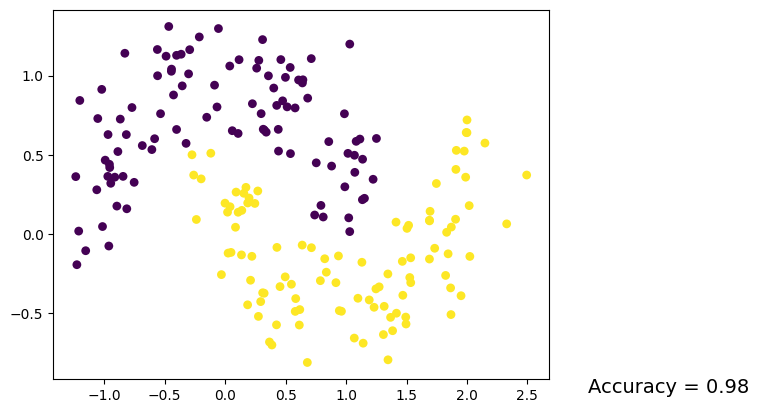

In [8]:
plt.ion()
for epoch in range(10000):
    out = network(x)
    loss = loss_function(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
         # show the learning process up until now
        max_value, prediction = torch.max(out,1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s = 40, c = predicted_y, lw = 0)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)

plt.ioff()
plt.show()

# Dynamic Plotting
    plt.ion()

##plt.ion()

This turns on interactive mode for matplotlib. This allows the plot to update dynamically during the training loop.


---


## Training Loop

    for epoch in range(10000):
      out = network(x)
      loss = loss_function(out, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

##for epoch in range(10000):

This loop runs for 10,000 epochs.

##out = network(x)

This feeds the input data x through the network to get the output predictions.

##loss = loss_function(out, y)

This calculates the loss between the predicted output out and the true labels y using the cross-entropy loss function.

##optimizer.zero_grad()

This clears the gradients of all optimized parameters. This is important because by default, gradients are accumulated in PyTorch.

##loss.backward()

This performs backpropagation, calculating the gradient of the loss with respect to the network parameters.

##optimizer.step()

This updates the network parameters based on the calculated gradients.

-----
#Conditional Plotting

    if epoch % 1000 == 0:
      max_value, prediction = torch.max(out, 1)
      predicted_y = prediction.data.numpy()
      target_y = y.data.numpy()
      plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], s = 40, c = predicted_y, lw = 0)
      accuracy = (predicted_y == target_y).sum() / target_y.size
      plt.text(3, -1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size': 14})
      plt.pause(0.1)

##if epoch % 1000 == 0:

Every 1000 epochs, the code inside this block is executed.

##max_value, prediction = torch.max(out, 1)

This finds the predicted class for each input by taking the maximum value across the output logits.

##predicted_y = prediction.data.numpy()

Converts the predicted class tensor to a NumPy array.

##target_y = y.data.numpy()

Converts the true labels tensor to a NumPy array.

##plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], s = 40, c = predicted_y, lw = 0):

This plots the input data points, coloring them based on the predicted class.

accuracy = (predicted_y == target_y).sum() / target_y.size: Calculates the accuracy by comparing the predicted labels with the true labels.

plt.text(3, -1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size': 14}): Displays the accuracy on the plot.

plt.pause(0.1): Pauses the plot for 0.1 seconds to allow the plot to update.

plt.ioff() and plt.show()

plt.ioff(): Turns off interactive mode.

plt.show(): Displays the final plot.

-----
#Summary
This code snippet trains a neural network for 10,000 epochs and dynamically updates a plot to show the learning process every 1,000 epochs.

The plot visualizes the input data colored by the predicted class, and it also displays the current accuracy. The use of interactive mode in matplotlib (plt.ion()) allows the plot to update in real-time during the training process.